In [69]:
import numpy as nm  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [70]:
data = pd.read_csv("C:/Users/selvi Murugan/Downloads/Species (1).csv")   

In [71]:
data

Name   EX  EW  Subtotal (EX+EW)  CR(PE)  CR(PEW)  \
0     MAXILLOPODA   83   6                50      26        2   
1        AMPHIBIA  190   4                18      69        0   
2      ASTEROIDEA  172  11               151      10        0   
3      GASTROPODA  208   0                51     141        0   
4     HEXANAUPLIA  113   2               199      15        0   
...           ...  ...  ..               ...     ...      ...   
1995    CHILOPODA   31   6                55      93        0   
1996   ASTEROIDEA  225   8                99     102        0   
1997  CEPHALOPODA   73   1               153      50        0   
1998  MAXILLOPODA  190  14               185     130        2   
1999   ECHINOIDEA   77  11               138      59        2   

      Subtotal (EX+EW+ CR(PE)+CR(PEW))   CR   EN   VU  \
0                                   69  202   28   43   
1                                  360  533  940  224   
2                                   94  275  430  274   
3                                  227  503  663   35   
4                                  185  371  665  512   
...                                ...  ...  ...  ...   
1995                               310  195  164  336   
1996                               241  118   39  599   
1997                                70  313  284  638   
1998                                65  594  520  554   
1999                               153  498  374  394   

      Subtotal (threatened spp.)  LR/cd  NT or LR/nt  LC or LR/lc  DD  Total  
0                           1416      1            0            1   1  11216  
1                            585      2            0            0   0  17148  
2                            110      4            0            1   1  18983  
3                           2071      3            1            1   0   7070  
4                           1364      0            0            1   0  20871  
...                          ...    ...          ...          ...  ..    ...  
1995                         927      2            0            1   1  10703  
1996                         718      4            1            0   1  15591  
1997                         424      0            1            0   0  11375  
1998                        1029      0            1            1   1   8763  
1999                        1208      3            1            1   0  11976  

[2000 rows x 16 columns]

In [72]:
data=data.drop(columns=['EX','EW','CR','EN','VU','LR/cd','NT or LR/nt','LC or LR/lc'])
data

Name  Subtotal (EX+EW)  CR(PE)  CR(PEW)  \
0     MAXILLOPODA                50      26        2   
1        AMPHIBIA                18      69        0   
2      ASTEROIDEA               151      10        0   
3      GASTROPODA                51     141        0   
4     HEXANAUPLIA               199      15        0   
...           ...               ...     ...      ...   
1995    CHILOPODA                55      93        0   
1996   ASTEROIDEA                99     102        0   
1997  CEPHALOPODA               153      50        0   
1998  MAXILLOPODA               185     130        2   
1999   ECHINOIDEA               138      59        2   

      Subtotal (EX+EW+ CR(PE)+CR(PEW))  Subtotal (threatened spp.)  DD  Total  
0                                   69                        1416   1  11216  
1                                  360                         585   0  17148  
2                                   94                         110   1  18983  
3                                  227                        2071   0   7070  
4                                  185                        1364   0  20871  
...                                ...                         ...  ..    ...  
1995                               310                         927   1  10703  
1996                               241                         718   1  15591  
1997                                70                         424   0  11375  
1998                                65                        1029   1   8763  
1999                               153                        1208   0  11976  

[2000 rows x 8 columns]

In [73]:
#import pandas as pd

# Assuming you have a DataFrame named 'data'
#value_to_find = '1,160'  # The value you're looking for

# Find the row index where the value matches in the 'CR(PE)' column
#row_index = data[data['CR(PE)'] == value_to_find].index[0]

# Drop the row with the specified index
#data.drop(index=row_index, inplace=True)

#print("Row index:", row_index)


In [74]:

# Preprocess columns with numeric values that have commas
#numeric_columns = ['Subtotal (threatened spp.)', 'DD', 'Total']
#for col in numeric_columns:
   # data[col] = data[col].str.replace(',', '').astype(float)

# Display the cleaned DataFrame
#print(data)


In [75]:
from sklearn import preprocessing

In [76]:
le=preprocessing.LabelEncoder()
data['Name']=le.fit_transform(data['Name'])

In [77]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [78]:
x1=pd.DataFrame(x)
x1

0    1    2  3    4     5  6
0     24   50   26  2   69  1416  1
1      1   18   69  0  360   585  0
2      4  151   10  0   94   110  1
3     17   51  141  0  227  2071  0
4     18  199   15  0  185  1364  0
...   ..  ...  ... ..  ...   ... ..
1995  10   55   93  0  310   927  1
1996   4   99  102  0  241   718  1
1997   9  153   50  0   70   424  0
1998  24  185  130  2   65  1029  1
1999  15  138   59  2  153  1208  0

[2000 rows x 7 columns]

In [79]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
x[:,0]=label.fit_transform(x[:,0])
x[:,3]=label.fit_transform(x[:,3])
x[:,4]=label.fit_transform(x[:,4])

x

array([[  24,   50,   26, ...,   66, 1416,    1],
       [   1,   18,   69, ...,  356,  585,    0],
       [   4,  151,   10, ...,   91,  110,    1],
       ...,
       [   9,  153,   50, ...,   67,  424,    0],
       [  24,  185,  130, ...,   62, 1029,    1],
       [  15,  138,   59, ...,  150, 1208,    0]], dtype=int64)

In [80]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)  

In [81]:
from sklearn.ensemble import RandomForestRegressor 
classifier= RandomForestRegressor(n_estimators= 1000,criterion="mse")  
classifier.fit(x_train, y_train)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', n_estimators=1000)

In [82]:
y_test

array([ 2018,  5248,  5086, 17748, 15010, 17759, 13852,  6535,  4974,
         674, 11847,  8355, 20774,  6392, 10059, 17202, 15546, 20731,
       11063,  7434, 16217, 20702,  5900, 17344,  6707,  5205,  1769,
       15572, 11865, 16950, 20041, 11920, 19811,  7083, 18714, 20315,
       11349,  8777,  7785,  2816,  3685, 11940, 11357,  8174, 14192,
       16613, 10699, 15377,  9221,  8579, 17970,  8251, 17207, 18324,
       17564,  7402, 10148, 13528, 14533, 11909, 19023,  6303, 14391,
       18785, 12022, 10599, 14268, 12506, 19583,  7405, 10724, 16211,
       19529, 11499, 17708, 15440,  8026,  1076, 16494, 14521,   327,
       12206, 15565, 10291,  8513, 18566, 13483, 17701, 20241, 12784,
       16162, 17389,  4036, 15226, 16648, 11976, 15363, 18095, 13753,
       17146,  9487, 10808,  2840, 20692,  1668,  5115, 12734, 17528,
        8156,  3156,  7836,  7470,  5483, 11551,  7731,  9384, 15475,
       15659,  1508,  2873, 12762,  2843,  5311,  1817,  7431,  9012,
       14603, 13747,

In [83]:

# Continue with your prediction
y_pred = classifier.predict(x_test)


In [84]:
y_pred

array([10535.527, 12966.55 , 10213.049, 14188.083, 13006.585, 10396.332,
       10734.152, 10210.642, 11413.199, 15335.82 , 11377.731, 10608.89 ,
       12849.682, 11758.052, 11473.327, 11266.478, 13206.788, 10693.057,
       12515.281, 10543.649,  9976.906, 13930.81 , 10089.084, 10669.64 ,
       12317.858, 11753.63 , 10173.497, 11272.529, 10101.943, 10023.336,
       12191.9  , 11553.582, 11280.531, 12873.665, 10989.111,  7979.642,
       11792.01 ,  8816.919, 11144.504,  9677.09 , 12002.534, 10173.266,
        9553.645, 12246.466, 12241.578, 12476.998,  8137.643, 12939.816,
       13343.446, 11666.142, 11598.613,  9988.33 ,  9130.444,  7229.174,
       10359.9  ,  8891.248, 13083.728, 11607.746, 11630.811,  9628.399,
       11935.795, 10478.359, 12284.025, 11197.391, 11425.816, 11209.063,
       10928.261,  9346.671, 11160.579, 13115.469, 14081.551, 11227.079,
       11097.696, 10800.992, 12949.552,  9335.757,  8685.504, 12072.341,
       12439.42 , 11211.057, 12553.491, 12350.943, 

In [85]:
predictions = classifier.predict(x_test)
predictions

array([10535.527, 12966.55 , 10213.049, 14188.083, 13006.585, 10396.332,
       10734.152, 10210.642, 11413.199, 15335.82 , 11377.731, 10608.89 ,
       12849.682, 11758.052, 11473.327, 11266.478, 13206.788, 10693.057,
       12515.281, 10543.649,  9976.906, 13930.81 , 10089.084, 10669.64 ,
       12317.858, 11753.63 , 10173.497, 11272.529, 10101.943, 10023.336,
       12191.9  , 11553.582, 11280.531, 12873.665, 10989.111,  7979.642,
       11792.01 ,  8816.919, 11144.504,  9677.09 , 12002.534, 10173.266,
        9553.645, 12246.466, 12241.578, 12476.998,  8137.643, 12939.816,
       13343.446, 11666.142, 11598.613,  9988.33 ,  9130.444,  7229.174,
       10359.9  ,  8891.248, 13083.728, 11607.746, 11630.811,  9628.399,
       11935.795, 10478.359, 12284.025, 11197.391, 11425.816, 11209.063,
       10928.261,  9346.671, 11160.579, 13115.469, 14081.551, 11227.079,
       11097.696, 10800.992, 12949.552,  9335.757,  8685.504, 12072.341,
       12439.42 , 11211.057, 12553.491, 12350.943, 

In [86]:
# Use the forest's predict method on the test data
predictions = classifier.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
round(np.mean(errors),2)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4891.66 degrees.


In [87]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -86.24 %.


In [88]:
arr1=data['Name']
arr2=data['Total']

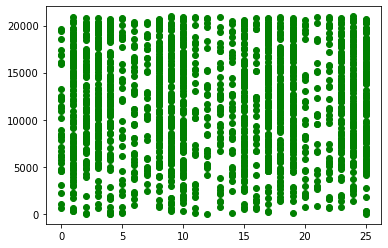

In [89]:
plt.scatter(arr1,arr2,color='green')
plt.show()

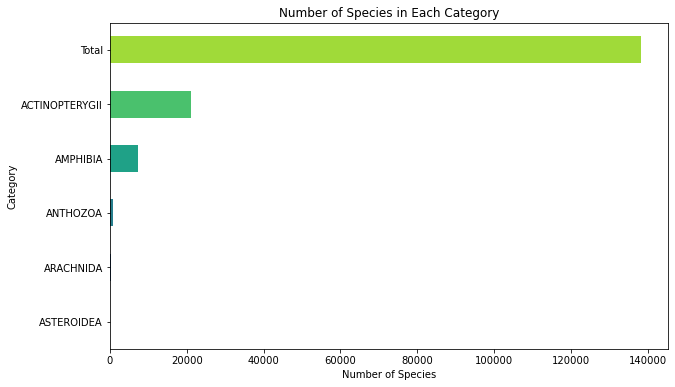

<Figure size 720x432 with 0 Axes>

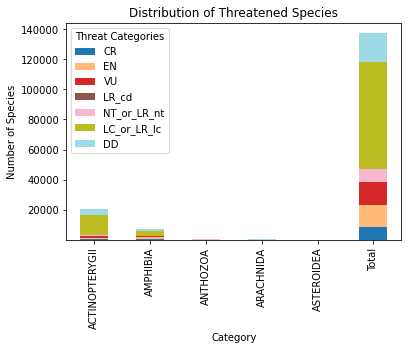

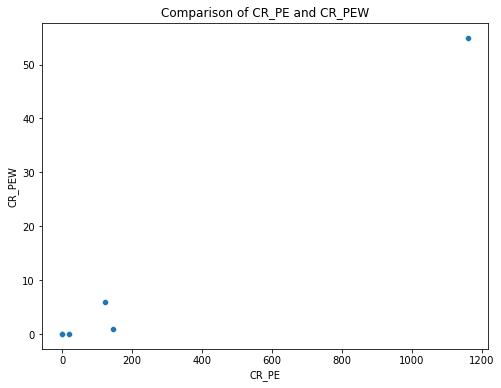

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the provided dataset
data = {
    "Name": ["ACTINOPTERYGII", "AMPHIBIA", "ANTHOZOA", "ARACHNIDA", "ASTEROIDEA", "Total"],
    "EX": [79, 35, 0, 9, 0, 902],
    "EW": [10, 2, 0, 0, 0, 80],
    "Subtotal_EX_EW": [89, 37, 0, 9, 0,982],
    "CR_PE": [122, 146, 1, 21, 0, 1160],
    "CR_PEW": [6, 1, 0, 0, 0,55],
    "Subtotal_CR_PE_PEW": [217, 184, 1, 30, 0,2197],
    "CR": [626, 663, 6, 68, 1,8404],
    "EN": [1000, 1060, 26, 88, 0,14647],
    "VU": [1241, 721, 202, 62, 0,15492],
    "Subtotal_threatened_spp": [2867, 2444, 234, 218, 1,38543],
    "LR_cd": [0, 0, 0, 0, 0,170],
    "NT_or_LR_nt": [630, 421, 175, 20, 0,8127],
    "LC_or_LR_lc": [13064, 3129, 293, 91, 0,71148],
    "DD": [4356, 1184, 166, 55, 1,19404],
    "Total": [21006, 7215, 868, 393, 1,138374]
}

df = pd.DataFrame(data)

# Set the "Name" column as the index
df.set_index("Name", inplace=True)

# Create a bar chart showing the number of species in each category
plt.figure(figsize=(10, 6))
df["Total"].sort_values().plot(kind="barh", color=sns.color_palette("viridis", len(df)))
plt.xlabel("Number of Species")
plt.ylabel("Category")
plt.title("Number of Species in Each Category")
plt.show()

# Create a stacked bar chart for the distribution of threatened species
threat_columns = ["CR", "EN", "VU", "LR_cd", "NT_or_LR_nt", "LC_or_LR_lc", "DD"]
plt.figure(figsize=(10, 6))
df[threat_columns].plot(kind="bar", stacked=True, cmap="tab20")
plt.xlabel("Category")
plt.ylabel("Number of Species")
plt.title("Distribution of Threatened Species")
plt.legend(title="Threat Categories")
plt.show()

# Create a scatter plot comparing CR_PE to CR_PEW
plt.figure(figsize=(8, 6))
sns.scatterplot(x="CR_PE", y="CR_PEW", data=df)
plt.xlabel("CR_PE")
plt.ylabel("CR_PEW")
plt.title("Comparison of CR_PE and CR_PEW")
plt.show()
